In [1]:
!pip install textblob
!pip install nltk

!pip install textstat

In [2]:
!pip install beautifulsoup4
!pip install lxml

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yehrimhwang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yehrimhwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yehrimhwang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/yehrimhwang/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
from policy_loader import create_analyzer_with_files
from policy_analyzer import PolicyAnalyzer
from sentiment import PolicySentimentAnalyzer, generate_sentiment_report 
from policy_loader import create_analyzer_with_files

**Defining policy versions and their corresponding HTML file paths** :

In [3]:
versions = {
    '2013-06-08': 'thisisyourdigitallife.html',
    '2015-12-04': 'FBfoundOut_CA.html',
    '2018-02-01': 'pre_CA.html',
    '2018-08-02': 'post_CA.html',
    '2019-03-01': 'pre_cultura.html',
    '2019-05-31': 'post_cultura.html',
    '2024-12-04' : 'currentpolicy.html'
}

In [10]:
import pandas as pd
from bs4 import BeautifulSoup
import sys 
total_word_count = 0

print("Word Count Per File ")

# looping through the filenames in the dictionary's vals
for filename in versions.values():
    try:
        with open(filename, 'r', encoding='utf-8') as f:
            html_content = f.read()
            
            soup = BeautifulSoup(html_content, 'html.parser')
            
            text = soup.get_text()
            
            words = text.split()
            
            file_word_count = len(words)
            
            print(f"{filename}: {file_word_count} words")
            
            total_word_count += file_word_count

    except FileNotFoundError:
        print(f"ERROR: File not found: {filename}", file=sys.stderr)
    except Exception as e:
        print(f"Error processing {filename}: {e}", file=sys.stderr)

print("---------------------------")
print(f"**Total Word Count:** {total_word_count}")

Word Count Per File 
thisisyourdigitallife.html: 3893 words
FBfoundOut_CA.html: 3899 words
pre_CA.html: 6208 words
post_CA.html: 6393 words
pre_cultura.html: 6787 words
post_cultura.html: 6963 words
currentpolicy.html: 5202 words
---------------------------
**Total Word Count:** 39345


**Loading policy files + initializing analyzer** :

In [4]:
print("Initializing PolicyAnalyzer and loading policies...")
analyzer = create_analyzer_with_files(versions)
sentiment_analyzer = PolicySentimentAnalyzer()

Initializing PolicyAnalyzer and loading policies...


In [5]:
target_policy_date_2 = '2019-05-31'
if target_policy_date_2 in analyzer.policies:
    print(f"Processed tokens for policy {target_policy_date_2}:")
    # print(analyzer.policies[target_policy_date_2]['processed_word_tokens']) # This might be very long
    # More targeted check:
    if 'graham' in analyzer.policies[target_policy_date_2]['processed_word_tokens']:
        print("'graham' IS in processed_word_tokens.")
    else:
        print("'graham' IS NOT in processed_word_tokens.")
else:
    print(f"Policy {target_policy_date_2} not found.")

Processed tokens for policy 2019-05-31:
'graham' IS NOT in processed_word_tokens.


In [6]:
from policy_loader import PolicyFileLoader

loader = PolicyFileLoader()

# Specify the problematic file and the word we're looking for
file_to_debug = 'post_cultura.html'  # This is the file for date 2019-05-31
word_to_find = 'graham'

print(f"--- Debugging output for: {file_to_debug} ---")

# Load the single HTML file and get the cleaned text
cleaned_text = loader.load_html_file(file_to_debug, 'debug_date')
cleaned_text_lower = cleaned_text.lower()

# Check if the word exists and print the context
if word_to_find in cleaned_text_lower:
    print(f"\nSUCCESS: Found '{word_to_find}' in the text extracted by PolicyFileLoader.")
    
    # Find the position of the word to print the surrounding context
    index = cleaned_text_lower.find(word_to_find)
    
    # Define a "window" of characters to show around the word
    context_window = 250
    start_index = max(0, index - context_window)
    end_index = min(len(cleaned_text), index + context_window)
    
    # Print the context
    print("\nHere is the text snippet where the word was found:\n")
    print("---------------------------------CONTEXT-START---------------------------------")
    print(f"...{cleaned_text[start_index:end_index]}...")
    print("----------------------------------CONTEXT-END----------------------------------")
    
    print("\nThis confirms the cleaning logic in 'policy_loader.py' is not fully removing all non-policy HTML components.")
    
else:
    print(f"\nFAILURE: The word '{word_to_find}' was NOT found in the cleaned text.")
    print("This suggests the issue might be happening later in the 'policy_analyzer.py' preprocessing step.")


--- Debugging output for: post_cultura.html ---

FAILURE: The word 'graham' was NOT found in the cleaned text.
This suggests the issue might be happening later in the 'policy_analyzer.py' preprocessing step.


# Summary of Topic and Requirement Statement Changes 
- **Overalll Similarity**: Similarity between two documents as a whole.

- **Similarity of Significant Requirement Change Statements**: similarity between an old and new 'requirement statement' (discrete, actionable instructions in the policy)
    - **Note on 'Significant Requirement Change' Statements**: old-new pairs of statements are only shown if their 'requirement' wording has a cosine-similarity of >0.5 (configured in policy_analyzer).This ensures the comparison of two versions of statements that may use differential wording while still having similar general underlying meaning. 
    
- **Requirement indicators (configured in policy_analyzer)**:  'must', 'shall', 'required', 'need to', 'have to', 'mandatory',  'will not', 'cannot', 'may not', 'obligated', 'obligation', 'forbidden', 'restricted', 'prohibited', 'mandate', 'comply with', 'do not', 'shall not'. 


## Raw summary 

In [7]:
class color:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'   
   
print("##2013 (release of thisisyourdigitallife) vs 2015 (Facebook asks CA to eradicate data):")
print(analyzer.generate_summary_report('2013-06-08', '2015-12-04'))
print("\n---\n") # Markdown horizontal rule


print(color.BOLD + color.UNDERLINE + "\n2015(FB asks CA to eradicate data) vs 2018.02 (before CA whistleblower expose):")
print(analyzer.generate_summary_report('2015-12-04', '2018-02-01'))

print(color.BOLD +  color.UNDERLINE + "\nChanges within 2018: Immediately Before/After CA Exposed:")
print(analyzer.generate_summary_report('2018-02-01', '2018-08-02'))

print(color.BOLD + color.UNDERLINE + "\nChanges within 2019: Immediately Before/After Cultura Collective Exposed:")
print(analyzer.generate_summary_report('2019-03-01', '2019-05-31'))

print(color.BOLD + color.UNDERLINE + "\n 2019 vs 2024:")
print(analyzer.generate_summary_report('2019-05-31', '2024-12-04'))

print(color.BOLD + color.UNDERLINE + "\n 2013 vs 2024:")
print(analyzer.generate_summary_report('2013-06-08', '2024-12-04'))


print(color.BOLD + color.UNDERLINE + "\n Changes after CA vs before Cultura")
print(analyzer.generate_summary_report('2018-08-02', '2019-03-01'))

print(color.BOLD + color.UNDERLINE + "\n Changes after CA vs after Cultura")
print(analyzer.generate_summary_report('2018-08-02', '2019-05-31'))
print(color.BOLD + color.UNDERLINE + "\n Changes before CA vs before Cultura")
print(analyzer.generate_summary_report('2018-02-01', '2019-03-01'))

print(color.BOLD + color.UNDERLINE + "\n Changes before CA vs after Cultura")
print(analyzer.generate_summary_report('2018-02-01', '2019-05-31'))


##2013 (release of thisisyourdigitallife) vs 2015 (Facebook asks CA to eradicate data):
Policy Change Analysis: 2013-06-08 to 2015-12-04
Overall Similarity: 71.50%

Topic Changes:
Data Collection: 2 → 2 (0)
User Consent: 2 → 1 (-1)
Data Sharing: 1 → 2 (+1)
Data Protection: 1 → 1 (0)
User Rights: 2 → 2 (0)
Compliance: 10 → 17 (+7)

Requirement Changes:
Total requirements before: 82
Total requirements after: 26
Similar requirements found: 9

Significant Requirement Changes:
%%START_SIG_REQ_DETAILS%%

Old: C. Third Party Content If your application contains content submitted or provided by third parties, you must comply with the following rules: In the United States you must take all steps required to fall within the applicable safe harbors of the Digital Millennium Copyright Act including designating an agent to receive notices of claimed infringement, instituting a repeat infringer termination policy and implementing a "notice and takedown" process.
New: In the United States, you must t

## Polished Summary


<details>
<summary> Code Description</summary>

- Loops through predefined list of `comparisons` and respective `report_markdown`.
- `report_html_interim`: report_markdown converted to HTML form.  
- `%%START/END_SIG_REQ_DETAILS%%`: starting/ending indicators sandwiching old/new/similarity data (alr in HTML form). Identified by ds_idx and de_idx respectivey
- `collapsible_details_html`: new inner &lt;details&gt; block containing old/new/similarty data. Has &lt;summary&gt; 'view/hide`. Replaces original segment in `report_html_interim`
- `final_report_html`: modified `report_html_interim`with new 'view/hide' block -> wrapped to new outer &lt;details&gt; block. Has &lt;summary&gt;of current comparison date 
    - e.g. "2013 (thisisyourdigitallife) vs 2015 (FB asks CA to eradicate data)"



In [ ]:
pip install markdown

In [ ]:

from IPython.display import display, HTML

comparisons = [
    {'title': "2013 (thisisyourdigitallife) vs 2015 (FB asks CA to eradicate data)", 'date1': '2013-06-08', 'date2': '2015-12-04'},
    {'title': "2015 (FB asks CA to eradicate data) vs 2018.02 (pre-CA expose)", 'date1': '2015-12-04', 'date2': '2018-02-01'},
    {'title': "Changes within 2018: Pre/Post CA Expose", 'date1': '2018-02-01', 'date2': '2018-08-02'},
    {'title': "Changes within 2019: Pre/Post Cultura Collective Expose", 'date1': '2019-03-01', 'date2': '2019-05-31'},
    {'title': "2019 vs 2024", 'date1': '2019-05-31', 'date2': '2024-12-04'},
    {'title': "Overall: 2013 vs 2024", 'date1': '2013-06-08', 'date2': '2024-12-04'}
]

html_output_parts = []
for comp in comparisons:
    report_markdown = analyzer.generate_summary_report(comp['date1'], comp['date2'])
    
    report_html_interim = report_markdown.replace("\n#### ", "<h4>").replace("\n### ", "<h3>").replace("\n## ", "<h2>").replace("\n**", "<strong>").replace("**", "</strong>").replace("\n-", "<li>-").replace("\n\n", "<br><br>").replace("\n", "<br>")

    # markers for the collapsible "Significant Requirement Changes" DETAILS
    #  "\n"  becomes "<br>" 
    details_start_marker = "%%START_SIG_REQ_DETAILS%%<br>" 
    details_end_marker = "<br>%%END_SIG_REQ_DETAILS%%"
    
    final_report_html = report_html_interim # Default to interim

    ds_idx = report_html_interim.find(details_start_marker)
    
    if ds_idx != -1:
        # The content for details starts right after the details_start_marker
        content_for_details_start_idx = ds_idx + len(details_start_marker)
        de_idx = report_html_interim.find(details_end_marker, content_for_details_start_idx)
        
        if de_idx != -1:
            sig_req_details_content_html = report_html_interim[content_for_details_start_idx : de_idx].strip()
            
            # Create the collapsible HTML for this subsection's details
            collapsible_details_html = f"""
            <details>
                <summary style="font-size: 0.9em; font-style: italic; cursor: pointer; margin-top: 3px; margin-bottom: 3px;">View/Hide </summary>
                <div style="padding-left: 15px; border-left: 1px solid #eee; margin-top: 5px;">
                {sig_req_details_content_html}
                </div>
            </details>
            """
            
            part_to_replace = report_html_interim[ds_idx : de_idx + len(details_end_marker)]
            
            final_report_html = report_html_interim.replace(part_to_replace, collapsible_details_html)
            
        else: # details_end_marker not found, clean up start marker if it exists
            final_report_html = report_html_interim.replace(details_start_marker, "")
            
    final_report_html = final_report_html.replace("%%START_SIG_REQ_DETAILS%%<br>", "").replace("<br>%%START_SIG_REQ_DETAILS%%", "")
    final_report_html = final_report_html.replace("<br>%%END_SIG_REQ_DETAILS%%", "").replace("%%END_SIG_REQ_DETAILS%%", "")


    html_output_parts.append(f"""
    <details>
        <summary style="font-size: 1.2em; font-weight: bold; cursor: pointer; margin-bottom: 10px;">{comp['title']}</summary>
        <div style="padding-left: 20px; border-left: 2px solid #ccc; margin-top: 10px;">
        {final_report_html}
        </div>
    </details>
    <hr>
    """)

display(HTML("".join(html_output_parts)))

# featureselec
total num of unique tokens across entire corpus: 1531

lazy estimated ave unique tokens per doc: 750 

In [13]:
target_policy_date = '2024-12-04'
target_policy_date_2 = '2019-05-31'

In [ ]:


distinguishing_words_info_logodds = analyzer.get_distinguishing_words_log_odds_prior(
    target_date=target_policy_date, 
    prior_total=750, 
    top_n=10
)

print(f"\n--- Top 10 Distinguishing Words for Policy {target_policy_date} (Log-Odds Ratio with Prior  ---")
if "error" in distinguishing_words_info_logodds:
    print(distinguishing_words_info_logodds["error"])
elif distinguishing_words_info_logodds["top_distinguishing_words"]:
    for item in distinguishing_words_info_logodds["top_distinguishing_words"]:
        print(f"- '{item['word']}': Log-Odds Ratio = {item['log_odds_ratio']:.3f}")
else:
    print("No distinguishing words found or an issue occurred.")

# You can try another policy as target:
distinguishing_words_info_logodds_2 = analyzer.get_distinguishing_words_log_odds_prior(
    target_date=target_policy_date_2,
    prior_total=750, # Example value
    top_n=10
)

print(f"\n--- Top 10 Distinguishing Words for Policy {target_policy_date_2} (Log-Odds Ratio with Prior) ---")
if "error" in distinguishing_words_info_logodds_2:
    print(distinguishing_words_info_logodds_2["error"])
elif distinguishing_words_info_logodds_2["top_distinguishing_words"]:
    for item in distinguishing_words_info_logodds_2["top_distinguishing_words"]:
        print(f"- '{item['word']}': Log-Odds Ratio = {item['log_odds_ratio']:.3f}")
else:
    print("No distinguishing words found or an issue occurred.")

Total unique words in the target doc: 836

--- Top 10 Distinguishing Words for Policy 2024-12-04 (Log-Odds Ratio with Prior  ---
- 'meta': Log-Odds Ratio = 5.070
- 'gaming': Log-Odds Ratio = 5.060
- 'attempt': Log-Odds Ratio = 5.060
- 'behavior': Log-Odds Ratio = 5.060
- 'cloud': Log-Odds Ratio = 5.060
- 'ar': Log-Odds Ratio = 5.060
- 'spark': Log-Odds Ratio = 5.060
- 'identity': Log-Odds Ratio = 5.059
- 'upsell': Log-Odds Ratio = 5.059
- 'human': Log-Odds Ratio = 5.059
Total unique words in the target doc: 994

--- Top 10 Distinguishing Words for Policy 2019-05-31 (Log-Odds Ratio with Prior) ---
- 'meaningfully': Log-Odds Ratio = 4.809
- 'prediction': Log-Odds Ratio = 1.414
- 'assessment': Log-Odds Ratio = 1.414
- 'suspend': Log-Odds Ratio = 1.414
- 'trait': Log-Odds Ratio = 1.413
- 'accessed': Log-Odds Ratio = 1.413
- 'utility': Log-Odds Ratio = 1.413
- 'tendency': Log-Odds Ratio = 1.413
- 'character': Log-Odds Ratio = 1.413
- 'april': Log-Odds Ratio = 1.413


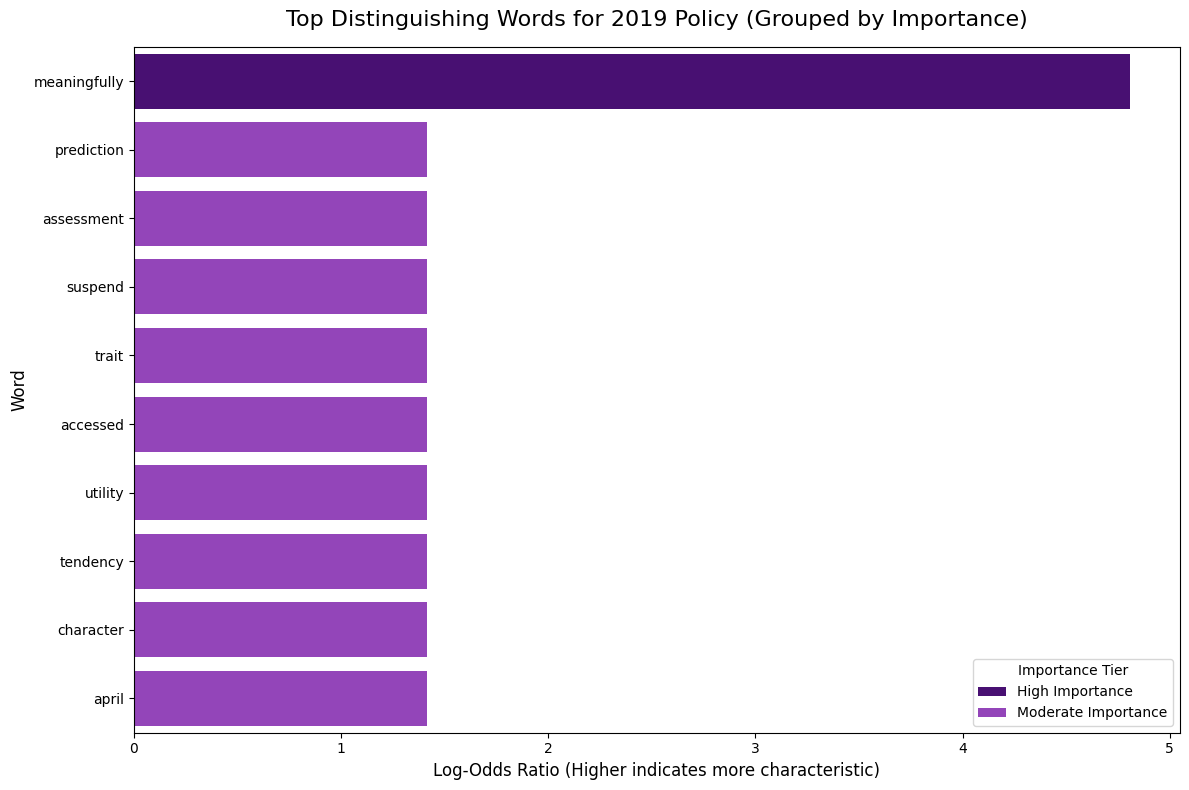

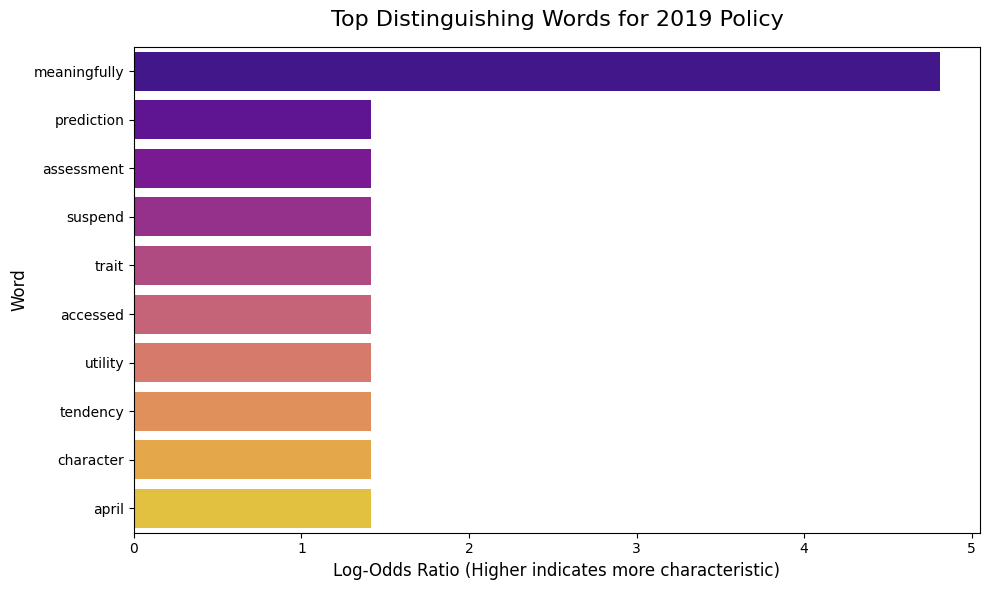

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data for the 2019 Policy
dist_words_2019 = {
    'meaningfully': 4.809, 'prediction': 1.414, 'assessment': 1.414,
    'suspend': 1.414, 'trait': 1.413, 'accessed': 1.413,
    'utility': 1.413, 'tendency': 1.413, 'character': 1.413, 'april': 1.413
}
df_2019 = pd.DataFrame(list(dist_words_2019.items()), columns=['Word', 'Log-Odds Ratio'])

# --- Create a 'Tier' column for visual grouping ---
# We'll classify the words based on their scores to assign them a tier.
def assign_tier(score):
    if score > 2.0:
        return 'High Importance'
    else:
        return 'Moderate Importance'

df_2019['Tier'] = df_2019['Log-Odds Ratio'].apply(assign_tier)
df_2019 = df_2019.sort_values('Log-Odds Ratio', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Log-Odds Ratio',
    y='Word',
    data=df_2019,
    hue='Tier',  # Use the 'Tier' column for color coding
    palette={'High Importance': '#4b0082', 'Moderate Importance': '#9932CC'}, # Indigo and DarkOrchid
    dodge=False # This prevents the bars from being split by hue
)

plt.title("Top Distinguishing Words for 2019 Policy (Grouped by Importance)", fontsize=16, pad=15)
plt.xlabel("Log-Odds Ratio (Higher indicates more characteristic)", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.legend(title='Importance Tier', fontsize=10)
plt.tight_layout()
plt.show()
# --- Visualization for 2019-05-31 Policy Distinguishing Words ---
dist_words_2019 = {
    'meaningfully': 4.809, 'prediction': 1.414, 'assessment': 1.414,
    'suspend': 1.414, 'trait': 1.413, 'accessed': 1.413,
    'utility': 1.413, 'tendency': 1.413, 'character': 1.413, 'april': 1.413
}
df_2019 = pd.DataFrame(list(dist_words_2019.items()), columns=['Word', 'Log-Odds Ratio']).sort_values('Log-Odds Ratio', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Log-Odds Ratio', y='Word', data=df_2019, palette='plasma')
plt.title("Top Distinguishing Words for 2019 Policy", fontsize=16, pad=15)
plt.xlabel("Log-Odds Ratio (Higher indicates more characteristic)", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.tight_layout()
plt.show()

# Sentiment and Subjectivity Analysis
**Sentiment shifts**:  Moving from neutral to more positive language ("protect" vs "collect")
- Positive sentiment: Favorable, optimistic, or approving language ("excellent," "love," "thrilled")
- Negative sentiment: Unfavorable, pessimistic, or critical language ("terrible," "hate," "disappointed")
- Neutral sentiment: Factual, balanced, or emotionally neutral language
- Scale: -1 (very negative) to +1 (very positive)

**Subjectivity shifts**: Moving from objective legal language to more subjective, marketing-friendly tone: 
- Subjective: Personal opinions, emotions, beliefs, speculation ("I think," "beautiful," "probably")
- Objective: Factual statements, neutral reporting, verifiable information ("contains," "located at," "measures")
- Scale: 0 (completely objective) to 1 (completely subjective)


## Comparing sentiment/subjectivity b/t 2013 & 2015 policies

In [ ]:
policy_2013_text = analyzer.policies['2013-06-08']['text']
policy_2015_text = analyzer.policies['2015-12-04']['text']
sentiment_comparison_2013_2015 = sentiment_analyzer.compare_policies(policy_2013_text, policy_2015_text)
print("\nSentiment Comparison (2013 vs 2015):")
print(generate_sentiment_report(sentiment_comparison_2013_2015))

## Pre Cambridge Analytical Exposure vs Post Exposure

In [ ]:
policy_pre_ca_text = analyzer.policies['2018-02-01']['text']
policy_post_ca_text = analyzer.policies['2018-08-02']['text']
sentiment_comparison_pre_post_ca = sentiment_analyzer.compare_policies(policy_pre_ca_text, policy_post_ca_text)
print("\nSentiment Comparison (Pre-CA vs Post-CA Public Exposure):")
print(generate_sentiment_report(sentiment_comparison_pre_post_ca))

## Pre- Cultura Collectiva Exposure vs Post Exposure

In [ ]:
policy_pre_cultura_text = analyzer.policies['2019-03-01']['text']
policy_post_cultura_text = analyzer.policies['2019-05-31']['text']
sentiment_comparison_pre_post_cultura = sentiment_analyzer.compare_policies(policy_pre_cultura_text, policy_post_cultura_text)
print("\nSentiment Comparison (Pre-Cultura Colectiva vs Post-Cultura Colectiva):")
print(generate_sentiment_report(sentiment_comparison_pre_post_cultura))


## 2013 vs 2024

In [ ]:
policy_2024_text = analyzer.policies['2024-12-04']['text']
sentiment_comparison_2013_2024 = sentiment_analyzer.compare_policies(policy_2013_text, policy_2024_text)
print("\nSentiment Comparison (2013 vs 2024):")
print(generate_sentiment_report(sentiment_comparison_2013_2024))

## Table of all Highest Positive/Negative Sentiment Statements (2013-24)

In [ ]:
from IPython.display import HTML, display
import pandas as pd # For easier sorting and handling if needed

def display_all_key_sentiment_statements_html(policy_analyzer, sentiment_analyzer_instance):
    """
    Generates an HTML table of all most positive and most negative statements
    from all loaded policy versions, with conditional formatting for sentiment.

    takes 2 args: policy_analyzer (PolicyAnalyzer): The initialized PolicyAnalyzer with loaded policies.
    sentiment_analyzer_instance (PolicySentimentAnalyzer): An instance of PolicySentimentAnalyzer.
    """
    all_statements = []

    sorted_policy_dates = sorted(policy_analyzer.policies.keys())

    for date in sorted_policy_dates:
        policy_content = policy_analyzer.policies[date]
        policy_text = policy_content['text']
        
        analysis_results = sentiment_analyzer_instance.analyze_sentiment(policy_text)
        
        for sentence_info in analysis_results.get('most_positive_sentences', []):
            all_statements.append({
                'date': date,
                'category': 'Positive',
                'text': sentence_info['text'],
                'sentiment': sentence_info['sentiment']
            })
            
        for sentence_info in analysis_results.get('most_negative_sentences', []):
            all_statements.append({
                'date': date,
                'category': 'Negative',
                'text': sentence_info['text'],
                'sentiment': sentence_info['sentiment']
            })

    if not all_statements:
        display(HTML("<p>No key sentiment statements found or policies not loaded.</p>"))
        return

    html_output = "<h2>All Key Positive and Negative Sentiment Statements Across Policy Versions</h2>"
    html_output += "<table border='1' style='width:100%; border-collapse:collapse; font-size:0.9em;'>"
    html_output += """
    <thead>
        <tr>
            <th style='width:15%;'>Policy Date</th>
            <th style='width:10%;'>Category</th>
            <th style='width:60%;'>Sentence Text</th>
            <th style='width:15%;'>Sentiment Score</th>
        </tr>
    </thead>
    <tbody>
    """

    def _get_sentiment_style(sentiment_value): # Helper for sentiment score cell
        color = "black"
        font_weight = "normal"
        if sentiment_value > 0.2: color = "darkgreen"; font_weight = "bold"
        elif sentiment_value > 0: color = "green"
        elif sentiment_value < -0.2: color = "darkred"; font_weight = "bold"
        elif sentiment_value < 0: color = "red"
        return f"style='color:{color}; font-weight:{font_weight}; text-align:center;'"

    for stmt in all_statements:
        #determine color based on category 
        category_cell_color = 'green' if stmt['category'] == 'Positive' else 'red'

        html_output += "<tr>"
        html_output += f"<td>{stmt['date']}</td>"
        html_output += f"<td style='text-align:center; color:{category_cell_color}; font-weight:bold;'>{stmt['category']}</td>"
        html_output += f"<td>{stmt['text']}</td>"
        html_output += f"<td {_get_sentiment_style(stmt['sentiment'])}>{stmt['sentiment']:.3f}</td>"
        html_output += "</tr>"
        
    html_output += "</tbody></table>"
    
    display(HTML(html_output))

display_all_key_sentiment_statements_html(analyzer, sentiment_analyzer)

Policy Date,Category,Sentence Text,Sentiment Score
2013-06-08,Positive,Special provisions for games: a.,0.357
2013-06-08,Positive,"Principles Create a great user experience Build social and engaging applications Give users choice and control Help users share expressive and relevant content Be trustworthy Respect privacy Don't mislead, confuse, defraud, or surprise users Don't spam - encourage authentic communications Policies I.",0.489
2013-06-08,Positive,"Examples and Explanations We want you to be successful on Facebook Platform, and we believe that the best way to do so is to provide a great user experience.",0.850
2013-06-08,Negative,"You must not use Canvas apps to promote or link to game sites off of Facebook, and must not use emails obtained from us to promote or link to desktop web games off of Facebook.com.",-0.400
2013-06-08,Negative,"If you stop using Platform or we disable your application, you must delete all information about a user you have received from us unless: (a) it is basic account information; or (b) you have received explicit consent from the user to retain their data.",-0.375
2013-06-08,Negative,"By ""Facebook Platform Terms and Policies"" we mean the Statement of Rights and Responsibilities and the Platform Policies.",-0.312
2015-12-04,Positive,Don't charge for most of the content in your app.,0.500
2015-12-04,Positive,Be honest about your relationship with Facebook when talking to the press or users.,0.600
2015-12-04,Positive,"Any SDKs you receive from us are provided to you on an ""as is"" basis, without warranty of any kind.",0.600
2015-12-04,Negative,Don t use your Facebook.com game or email addresses you ve obtained from us to promote or link to a desktop web game off of Facebook.,-0.400


In [ ]:
from IPython.display import HTML, display
import html
import pandas as pd

# --- Parser for the sentiment report string (same as before) ---
def parse_sentiment_report_to_dict(report_string):
    metrics = {}
    lines = report_string.split('\n')
    context_prefix = "" 
    last_main_metric_for_context = ""

    for line in lines:
        line = line.strip()
        if not line or line == "----------------":
            continue

        if line.startswith("--- ") and "Policy Analysis ---" in line:
            continue # Section headers, metrics are self-contained
            
        if line == "Sentence Distribution Changes:":
            continue

        parts = line.split(':', 1)
        if len(parts) == 2:
            key = parts[0].strip()
            value = parts[1].strip()

            if key.startswith("– "): 
                metric_name = f"Sentence Dist. {key.lstrip('– ').strip()}"
            elif key in ["95% Confidence Interval", "Sample Size"] and last_main_metric_for_context:
                metric_name = f"{last_main_metric_for_context} - {key}"
            else:
                metric_name = key
                if "Mean Sentiment" in key: 
                    last_main_metric_for_context = key 
            
            metrics[metric_name] = value
            
    return metrics

# --- Comparisons Definition (same as before) ---
comparisons_for_table = [
    {
        'title': "2013 vs 2015",
        'full_title': "Sentiment Comparison (2013 vs 2015)",
        'date1': '2013-06-08',
        'date2': '2015-12-04'
    },
    {
        'title': "Pre-CA vs Post-CA",
        'full_title': "Sentiment Comparison (Pre-CA vs Post-CA Public Exposure)",
        'date1': '2018-02-01',
        'date2': '2018-08-02'
    },
    {
        'title': "Pre-Cultura vs Post-Cultura",
        'full_title': "Sentiment Comparison (Pre-Cultura Colectiva vs Post-Cultura Colectiva)",
        'date1': '2019-03-01',
        'date2': '2019-05-31'
    },
    {
        'title': "2013 vs 2024",
        'full_title': "Sentiment Comparison (2013 vs 2024)",
        'date1': '2013-06-08', 
        'date2': '2024-12-04'
    }
]

# --- Data Collection and Structuring (same as before) ---
all_parsed_reports = []
all_metric_keys = [] 

for comp_info in comparisons_for_table:
    try:
        policy1_text = analyzer.policies[comp_info['date1']]['text']
        policy2_text = analyzer.policies[comp_info['date2']]['text']
        
        sentiment_comparison_result = sentiment_analyzer.compare_policies(policy1_text, policy2_text)
        report_string = generate_sentiment_report(sentiment_comparison_result)
        
        parsed_metrics = parse_sentiment_report_to_dict(report_string)
        parsed_metrics['comparison_title'] = comp_info['title']
        all_parsed_reports.append(parsed_metrics)
        
        for key in parsed_metrics.keys():
            if key != 'comparison_title' and key not in all_metric_keys:
                all_metric_keys.append(key)
                
    except Exception as e:
        print(f"Error processing {comp_info['full_title']}: {e}")

# --- HTML Table Construction with STYLING CHANGES ---
html_table_parts = []
# General table style
table_style = "width:100%; border-collapse:collapse; font-family: Arial, sans-serif; font-size: 0.9em;"
# Style for header cells (<th>)
th_style_main = "padding: 10px; text-align: left; border: 1px solid #cccccc; color: #000000; background-color: #e9ecef; font-weight: bold;"
th_style_period = "padding: 10px; text-align: center; border: 1px solid #cccccc; color: #000000; background-color: #e9ecef; font-weight: bold;" # Made period headers also black text
# Style for metric label cells (first <td> in each tbody row)
td_metric_label_style = "padding: 8px; text-align: left; border: 1px solid #cccccc; color: #000000; background-color: #f8f9fa; font-weight: bold;"
# Style for data value cells (other <td> elements)
td_value_style = "padding: 8px; text-align: right; border: 1px solid #cccccc; color: #FFFFFF;" # Explicit black for data too

html_table_parts.append(f"<table border='1' style='{table_style}'>")
html_table_parts.append("<thead><tr>")
html_table_parts.append(f"<th style='{th_style_main}'>Metric</th>") # Metric header cell

for report_data in all_parsed_reports:
    html_table_parts.append(f"<th style='{th_style_period}'>{html.escape(report_data['comparison_title'])}</th>")
html_table_parts.append("</tr></thead><tbody>")

for metric_key in all_metric_keys:
    html_table_parts.append("<tr>")
    # Apply specific style for metric label cell
    html_table_parts.append(f"<td style='{td_metric_label_style}'>{html.escape(metric_key)}</td>")
    for report_data in all_parsed_reports:
        value = report_data.get(metric_key, 'N/A')
        # Apply specific style for data value cells
        html_table_parts.append(f"<td style='{td_value_style}'>{html.escape(str(value))}</td>")
    html_table_parts.append("</tr>")

html_table_parts.append("</tbody></table>")

# --- Display HTML (CRITICAL: Use display(HTML(...)) ) ---
final_html_output = "".join(html_table_parts)
display(HTML(final_html_output))

Metric,2013 vs 2015,Pre-CA vs Post-CA,Pre-Cultura vs Post-Cultura,2013 vs 2024
Sentiment Analysis,,,,
Overall Sentiment Change,0.038,-0.009,0.001,0.002
Subjectivity Change,0.021,0.011,0.000,-0.002
Average Sentence Sentiment Change,0.018,-0.003,0.001,0.003
New Policy - Mean Sentiment,0.036,0.030,0.031,0.021
New Policy - Mean Sentiment - 95% Confidence Interval,"[0.020, 0.052]","[0.018, 0.043]","[0.018, 0.043]","[0.008, 0.035]"
New Policy - Mean Sentiment - Sample Size,300 sentences,431 sentences,449 sentences,340 sentences
Old Policy - Mean Sentiment,0.018,0.033,0.030,0.018
Old Policy - Mean Sentiment - 95% Confidence Interval,"[-0.004, 0.040]","[0.020, 0.046]","[0.017, 0.042]","[-0.004, 0.040]"
Old Policy - Mean Sentiment - Sample Size,153 sentences,433 sentences,444 sentences,153 sentences


In [ ]:
from IPython.display import HTML, display
import html
import pandas as pd # Not strictly needed for this specific reordering, but good practice
/
# --- User-provided generate_sentiment_report function ---
# This function is defined by you and produces the report string.
def generate_sentiment_report(comparison):
    report = [
        "Sentiment Analysis:", # This line is currently ignored by the parser below, might want to add if needed
        "----------------",
        f"Overall Sentiment Change: {comparison['sentiment_change']:.3f}",
        f"Subjectivity Change: {comparison['subjectivity_change']:.3f}",
        f"Average Sentence Sentiment Change: {comparison['avg_sentiment_change']:.3f}",
        f"\nNew Policy - Mean Sentiment: {comparison['new_analysis']['average_sentence_sentiment']:.3f}",
        f"95% Confidence Interval: [{comparison['new_analysis']['confidence_interval'][0]:.3f}, {comparison['new_analysis']['confidence_interval'][1]:.3f}]",
        f"Sample Size: {comparison['new_analysis']['sample_size']} sentences",
        f"\nOld Policy - Mean Sentiment: {comparison['old_analysis']['average_sentence_sentiment']:.3f}",
        f"95% Confidence Interval: [{comparison['old_analysis']['confidence_interval'][0]:.3f}, {comparison['old_analysis']['confidence_interval'][1]:.3f}]",
        f"Sample Size: {comparison['old_analysis']['sample_size']} sentences",
        "\nSentence Distribution Changes:",
        f"- Positive sentences: {comparison['distribution_change']['positive']:+d}",
        f"- Neutral sentences: {comparison['distribution_change']['neutral']:+d}",
        f"- Negative sentences: {comparison['distribution_change']['negative']:+d}",
        "\n--- New Policy Analysis ---",
        f"Document Sentiment (New): {comparison['new_analysis']['document_sentiment']:.3f}",
        f"Document Subjectivity (New): {comparison['new_analysis']['document_subjectivity']:.3f}",
    ]
    
    report.extend([
        "\n--- Old Policy Analysis ---",
        f"Document Sentiment (Old): {comparison['old_analysis']['document_sentiment']:.3f}",
        f"Document Subjectivity (Old): {comparison['old_analysis']['document_subjectivity']:.3f}",
    ])
    return "\n".join(report)

# --- Parser for the sentiment report string ---
def parse_sentiment_report_to_dict(report_string):
    metrics = {}
    lines = report_string.split('\n')
    
    last_main_metric_for_context = "" # To correctly associate CI and Sample Size

    for line in lines:
        line = line.strip()
        # Skip lines that are headers, separators, or empty
        if not line or \
           line == "----------------" or \
           line.startswith("--- ") and "Policy Analysis ---" in line or \
           line == "Sentiment Analysis:" or \
           line == "Sentence Distribution Changes:":
            if "Mean Sentiment" not in line : # Reset context if it's not a lead-up to CI/Sample Size
                 last_main_metric_for_context = ""
            continue # Skip these lines from becoming metrics themselves
            
        parts = line.split(':', 1)
        if len(parts) == 2:
            key = parts[0].strip()
            value = parts[1].strip()

            # Create specific keys for items under "Sentence Distribution Changes"
            if key.startswith("- "): 
                metric_name = f"Sentence Dist. {key.lstrip('-– ').strip()}" # Handles both hyphen and en-dash
            # Create specific keys for CI and Sample Size based on context
            elif key in ["95% Confidence Interval", "Sample Size"] and last_main_metric_for_context:
                metric_name = f"{last_main_metric_for_context} - {key}"
            else:
                metric_name = key
                # Update context if this line is a "Mean Sentiment" line
                if "Mean Sentiment" in key: 
                    last_main_metric_for_context = key 
                else: # Reset context if it's another metric
                    last_main_metric_for_context = ""
            
            metrics[metric_name] = value
            
    return metrics

# --- Comparisons Definition (same as before) ---
comparisons_for_table = [
    {
        'title': "2013 vs 2015",
        'full_title': "Sentiment Comparison (2013 vs 2015)",
        'date1': '2013-06-08',
        'date2': '2015-12-04'
    },
    {
        'title': "Pre-CA vs Post-CA",
        'full_title': "Sentiment Comparison (Pre-CA vs Post-CA Public Exposure)",
        'date1': '2018-02-01',
        'date2': '2018-08-02'
    },
    {
        'title': "Pre-Cultura vs Post-Cultura",
        'full_title': "Sentiment Comparison (Pre-Cultura Colectiva vs Post-Cultura Colectiva)",
        'date1': '2019-03-01',
        'date2': '2019-05-31'
    },
    {
        'title': "2013 vs 2024",
        'full_title': "Sentiment Comparison (2013 vs 2024)",
        'date1': '2013-06-08', 
        'date2': '2024-12-04'
    }
]

# --- Data Collection and Structuring ---
all_parsed_reports_data = [] # Store list of dicts, one per report
found_metric_keys_set = set() # To collect all unique keys found

for comp_info in comparisons_for_table:
    try:
        # Ensure analyzer and sentiment_analyzer are available from your notebook environment
        policy1_text = analyzer.policies[comp_info['date1']]['text']
        policy2_text = analyzer.policies[comp_info['date2']]['text']
        
        sentiment_comparison_result = sentiment_analyzer.compare_policies(policy1_text, policy2_text)
        # generate_sentiment_report should be available from your environment
        report_string = generate_sentiment_report(sentiment_comparison_result) 
        
        parsed_metrics = parse_sentiment_report_to_dict(report_string)
        # Add a special key to identify the report, using the short title
        parsed_metrics['_comparison_period_title_'] = comp_info['title'] 
        all_parsed_reports_data.append(parsed_metrics)
        
        for key in parsed_metrics.keys():
            if key != '_comparison_period_title_':
                found_metric_keys_set.add(key)
                
    except Exception as e:
        print(f"Error processing {comp_info['full_title']}: {e}")

# --- Define Desired Order of Metrics ---
desired_order_of_metrics = [
    "Overall Sentiment Change",
    "Subjectivity Change",
    "Average Sentence Sentiment Change",
    "New Policy - Mean Sentiment",
    "New Policy - Mean Sentiment - 95% Confidence Interval",
    "New Policy - Mean Sentiment - Sample Size",
    "Old Policy - Mean Sentiment",
    "Old Policy - Mean Sentiment - 95% Confidence Interval",
    "Old Policy - Mean Sentiment - Sample Size",
    "Sentence Dist. - Positive sentences",
    "Sentence Dist. - Neutral sentences",
    "Sentence Dist. - Negative sentences",
    "Document Sentiment (New)",
    "Document Sentiment (Old)",
    "Document Subjectivity (New)",
    "Document Subjectivity (Old)"
]

# Create the final list of metric keys for table rows, respecting desired order
# and appending any other found keys at the end.
final_ordered_metric_keys = [key for key in desired_order_of_metrics if key in found_metric_keys_set]
for key in found_metric_keys_set:
    if key not in final_ordered_metric_keys:
        final_ordered_metric_keys.append(key)

# --- HTML Table Construction (Styling from previous successful output) ---
html_table_parts = []
table_style = "width:100%; border-collapse:collapse; font-family: Arial, sans-serif; font-size: 0.9em;"
th_style_main = "padding: 10px; text-align: left; border: 1px solid #cccccc; color: #000000; background-color: #e9ecef; font-weight: bold;"
th_style_period = "padding: 10px; text-align: center; border: 1px solid #cccccc; color: #000000; background-color: #e9ecef; font-weight: bold;"
td_metric_label_style = "padding: 8px; text-align: left; border: 1px solid #cccccc; color: #000000; background-color: #f8f9fa; font-weight: bold;"
td_value_style = "padding: 8px; text-align: right; border: 1px solid #cccccc; color: #FFFFF;"

html_table_parts.append(f"<table border='1' style='{table_style}'>")
html_table_parts.append("<thead><tr>")
html_table_parts.append(f"<th style='{th_style_main}'>Metric</th>")

# Column headers are the comparison period titles
for report_data in all_parsed_reports_data: # Use the collected data for headers
    html_table_parts.append(f"<th style='{th_style_period}'>{html.escape(report_data['_comparison_period_title_'])}</th>")
html_table_parts.append("</tr></thead><tbody>")

# Rows are the metrics, in the desired order
for metric_key in final_ordered_metric_keys:
    html_table_parts.append("<tr>")
    html_table_parts.append(f"<td style='{td_metric_label_style}'>{html.escape(metric_key)}</td>")
    # For each metric, get its value from each parsed report
    for report_data in all_parsed_reports_data:
        value = report_data.get(metric_key, 'N/A') 
        html_table_parts.append(f"<td style='{td_value_style}'>{html.escape(str(value))}</td>")
    html_table_parts.append("</tr>")

html_table_parts.append("</tbody></table>")

# --- Display HTML ---
final_html_output = "".join(html_table_parts)
display(HTML(final_html_output))


Metric,2013 vs 2015,Pre-CA vs Post-CA,Pre-Cultura vs Post-Cultura,2013 vs 2024
Overall Sentiment Change,0.038,-0.009,0.001,0.002
Subjectivity Change,0.021,0.011,0.000,-0.002
Average Sentence Sentiment Change,0.018,-0.003,0.001,0.003
New Policy - Mean Sentiment,0.036,0.030,0.031,0.021
New Policy - Mean Sentiment - 95% Confidence Interval,"[0.020, 0.052]","[0.018, 0.043]","[0.018, 0.043]","[0.008, 0.035]"
New Policy - Mean Sentiment - Sample Size,300 sentences,431 sentences,449 sentences,340 sentences
Old Policy - Mean Sentiment,0.018,0.033,0.030,0.018
Old Policy - Mean Sentiment - 95% Confidence Interval,"[-0.004, 0.040]","[0.020, 0.046]","[0.017, 0.042]","[-0.004, 0.040]"
Old Policy - Mean Sentiment - Sample Size,153 sentences,433 sentences,444 sentences,153 sentences
Document Sentiment (New),0.077,0.060,0.059,0.041


# Preparing dataframes for visualization

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('ggplot')

In [15]:

topic_data = {
    '2013': [1, 2, 1, 1, 2, 10],
    '2015': [1, 1, 2, 1, 2, 17],
    '2018-02': [1, 4, 2, 1, 2, 24],
    '2018-05': [2, 5, 2, 1, 2, 25],
    '2019-03': [1, 5, 2, 1, 2, 29],
    '2019-05': [1, 5, 3, 1, 2, 29],
    '2024': [2, 3, 3, 0, 3, 28]
}

topics_df = pd.DataFrame(topic_data, index=['Data Collection', 'User Consent', 'Data Sharing', 'Data Protection', 'User Rights', 'Compliance'])

similarity_data = {
    'Period': ['2013-2015', '2015-2018.02', '2018.02-2019.03', '2019-2024', '2013-2024'],
    'Similarity': [71.47, 94.98, 97.27, 81.65, 60.35]
}
similarity_df = pd.DataFrame(similarity_data)

requirements_data = {
    'Year': ['2013', '2015', '2018-02', '2018-08', '2019-03', '2019-05', '2024'],
    'Requirements': [82, 26, 41, 45, 47, 51, 33]
}
requirements_df = pd.DataFrame(requirements_data)

# UPDATED HEATMAP: Evolution of Topics in Policy (2013-2024)

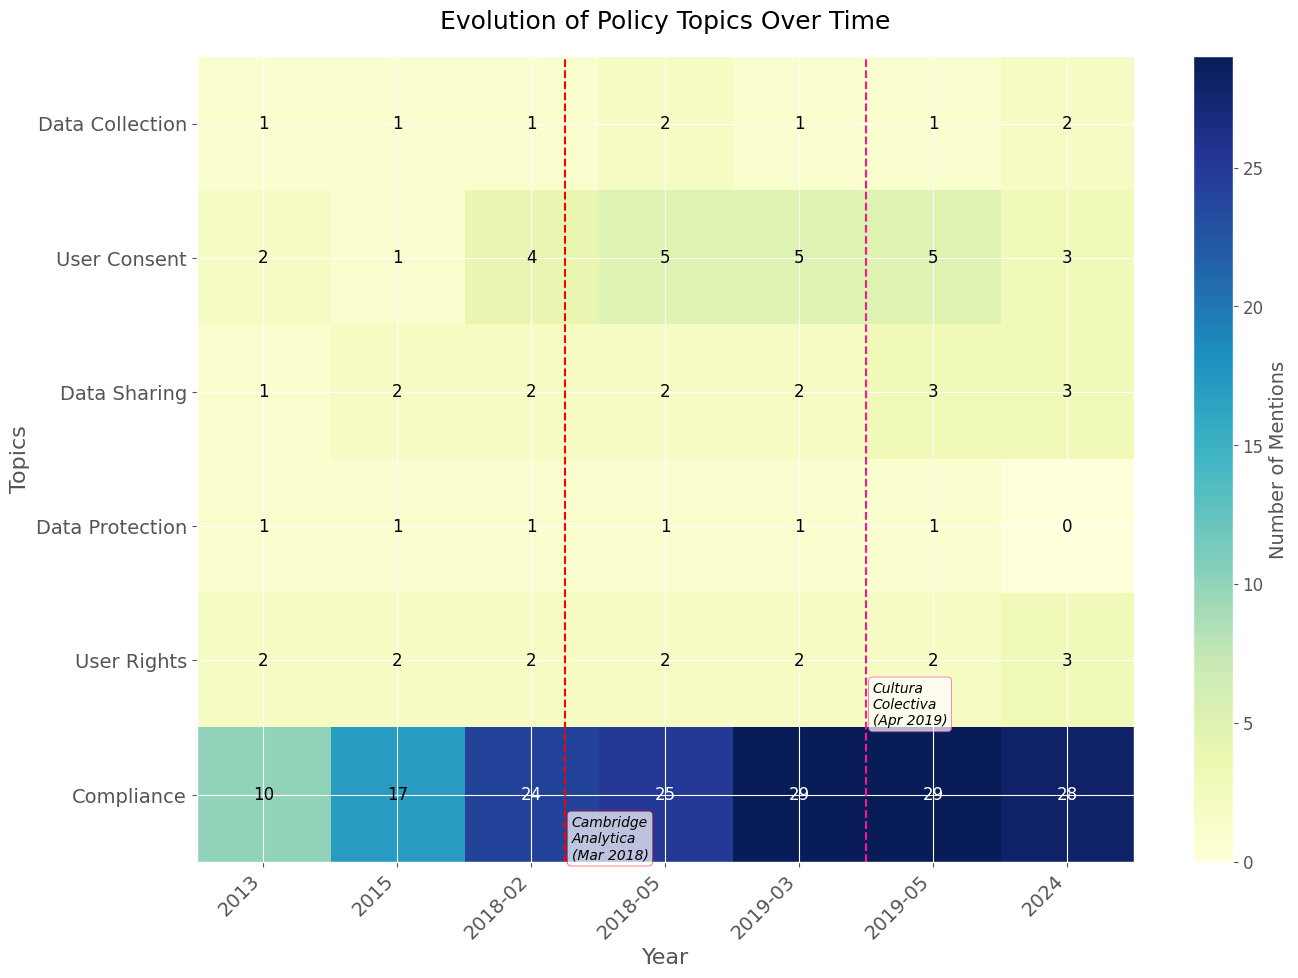

In [16]:
import matplotlib.colors as mcolors
plt.figure(figsize=(14, 10))

cmap_name = 'YlGnBu' # sequential color map for gradient

im = plt.imshow(topics_df.values, aspect='auto', cmap=cmap_name)

cbar = plt.colorbar(im) 
cbar.set_label('Number of Mentions', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.title('Evolution of Policy Topics Over Time', pad=20, fontsize=18)

plt.ylabel('Topics', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.xticks(range(len(topics_df.columns)), topics_df.columns, rotation=45, ha="right", fontsize=14)
plt.yticks(range(len(topics_df.index)), topics_df.index, fontsize=14)


min_val = topics_df.min().min()
max_val = topics_df.max().max()
for i in range(len(topics_df.index)):
    for j in range(len(topics_df.columns)):
        cell_value = topics_df.values[i, j]
        normalized_cell_value = (cell_value - min_val) / (max_val - min_val) if (max_val - min_val) > 0 else 0
        text_color = "white" if normalized_cell_value > 0.6 else "black" 
        plt.text(j, i, cell_value,
                 ha="center", va="center", color=text_color, fontsize=12, fontweight='medium')

"""adding text annos for ca/cc"""

ca_event_x = 2.25

# — CC anno is after 2019-03 (index 4) but before '2019-05' (index 5)
cc_event_x = 4.5

plt.axvline(
    x=ca_event_x,
    color='red',
    linestyle='--',
    linewidth=1.5
)
plt.text(
    ca_event_x + 0.05,                    
    len(topics_df.index) - 0.5,           
    "Cambridge\nAnalytica\n(Mar 2018)",
    ha='left', va='bottom',
    fontsize=10, style='italic',
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='red', alpha=0.7)
)

plt.axvline(
    x=cc_event_x,
    color='deeppink',
    linestyle='--',
    linewidth=1.5
)
plt.text(
    cc_event_x + 0.05,
    len(topics_df.index) - 1.5,          
    "Cultura\nColectiva\n(Apr 2019)",
    ha='left', va='bottom',
    fontsize=10, style='italic',
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='deeppink', alpha=0.7)
)

plt.tight_layout(pad=1.5)
plt.show()

# Magnitude of Policy Requirements over Time (2013-24)

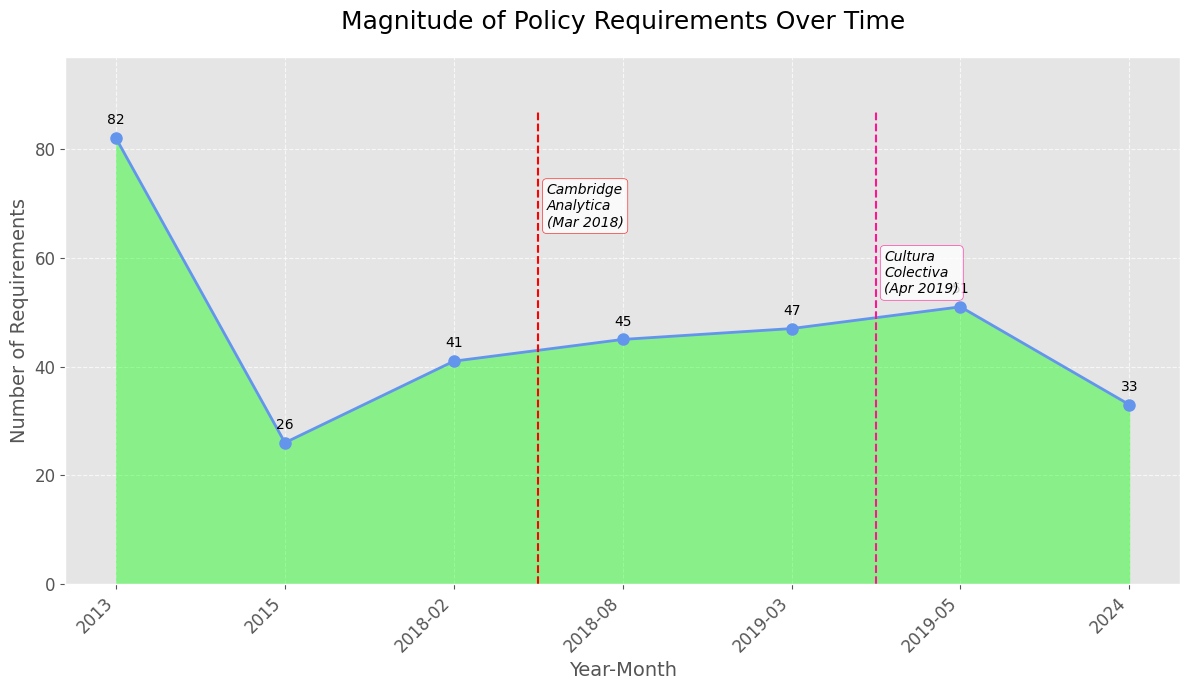

Area chart for policy requirements generated and saved as policy_requirements_area_chart.png


In [17]:
plt.figure(figsize=(12, 7))
plt.fill_between(requirements_df['Year'], requirements_df['Requirements'], color="lime", alpha=0.4)
plt.plot(requirements_df['Year'], requirements_df['Requirements'], marker='o',linewidth=2, markersize=8, color='cornflowerblue', linestyle='-')

for i, txt in enumerate(requirements_df['Requirements']):
    plt.annotate(txt, (requirements_df['Year'][i], requirements_df['Requirements'][i]),textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

plt.title('Magnitude of Policy Requirements Over Time', pad=20, fontsize=18)
plt.ylabel('Number of Requirements', fontsize=14)
plt.xlabel('Year-Month', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, requirements_df['Requirements'].max() + 15)

y_max_for_text = requirements_df['Requirements'].max()
ca_year_idx = requirements_df[requirements_df['Year'] == '2018-02'].index[0]
cc_year_idx = requirements_df[requirements_df['Year'] == '2019-03'].index[0]

# x-coordinates for CA/CC lines
ca_event_x = ca_year_idx + 0.5 # b/t '2018-02' and '2018-08'
cc_event_x = cc_year_idx + 0.5 # b/t '2019-03' and '2019-05'


# anno for CA 
plt.axvline(x=ca_event_x, color='red', linestyle='--', linewidth=1.5, ymax=0.9)
plt.text(
    ca_event_x + 0.05,
    y_max_for_text * 0.9,
    "Cambridge\nAnalytica\n(Mar 2018)",
    ha='left', va='top', fontsize=10, style='italic',
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='red', alpha=0.8)
)

# annotation for CC 
plt.axvline(x=cc_event_x, color='deeppink', linestyle='--', linewidth=1.5, ymax=0.9)
plt.text(
    cc_event_x + 0.05,
    y_max_for_text * 0.75,
    "Cultura\nColectiva\n(Apr 2019)",
    ha='left', va='top', fontsize=10, style='italic',
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='deeppink', alpha=0.8)
)

plt.tight_layout()
plt.show()
print("Area chart for policy requirements generated and saved as policy_requirements_area_chart.png")

# Stacked Bar Chart for Relative emphasis of policy topics (2013-24)
How much _relative attention_ FB gave to each topic in its policies over the years

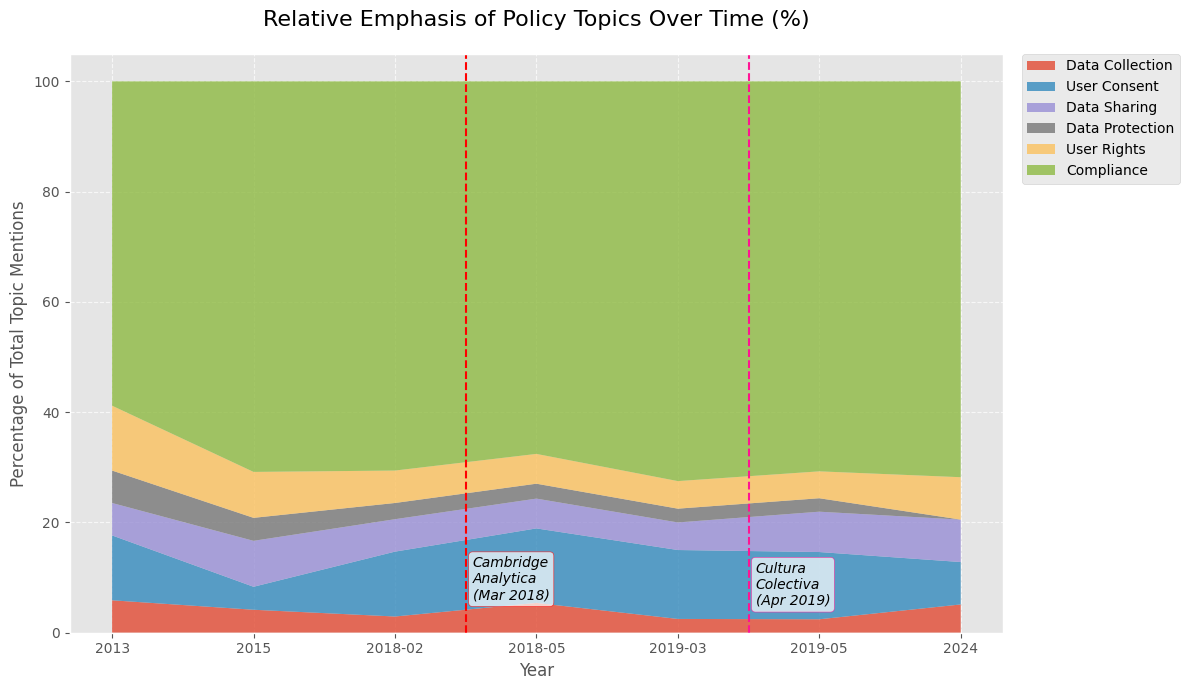

In [18]:
topics_df_pct = topics_df.apply(lambda x: x / x.sum() * 100)
plt.figure(figsize=(12, 7))
plt.stackplot(topics_df_pct.columns, topics_df_pct.values, labels=topics_df_pct.index, alpha=0.8, cmap='tab20')
plt.title('Relative Emphasis of Policy Topics Over Time (%)', pad=20, fontsize=16)
plt.ylabel('Percentage of Total Topic Mentions', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

plt.axvline(
    x=ca_event_x,
    color='red',
    linestyle='--',
    linewidth=1.5
)
plt.text(
    ca_event_x + 0.05,                    
    len(topics_df.index) - 0.5,           
    "Cambridge\nAnalytica\n(Mar 2018)",
    ha='left', va='bottom',
    fontsize=10, style='italic',
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='red', alpha=0.7)
)

plt.axvline(
    x=cc_event_x,
    color='deeppink',
    linestyle='--',
    linewidth=1.5
)
plt.text(
    cc_event_x + 0.05,
    len(topics_df.index) - 1.5,          
    "Cultura\nColectiva\n(Apr 2019)",
    ha='left', va='bottom',
    fontsize=10, style='italic',
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='deeppink', alpha=0.7)
)


plt.show()

# Sentiment vs Subjectivity Radar Plot

Values show magnitude of change. 
- Points closer to center / in neg range = negative change 
- Points further out from center = positive change 

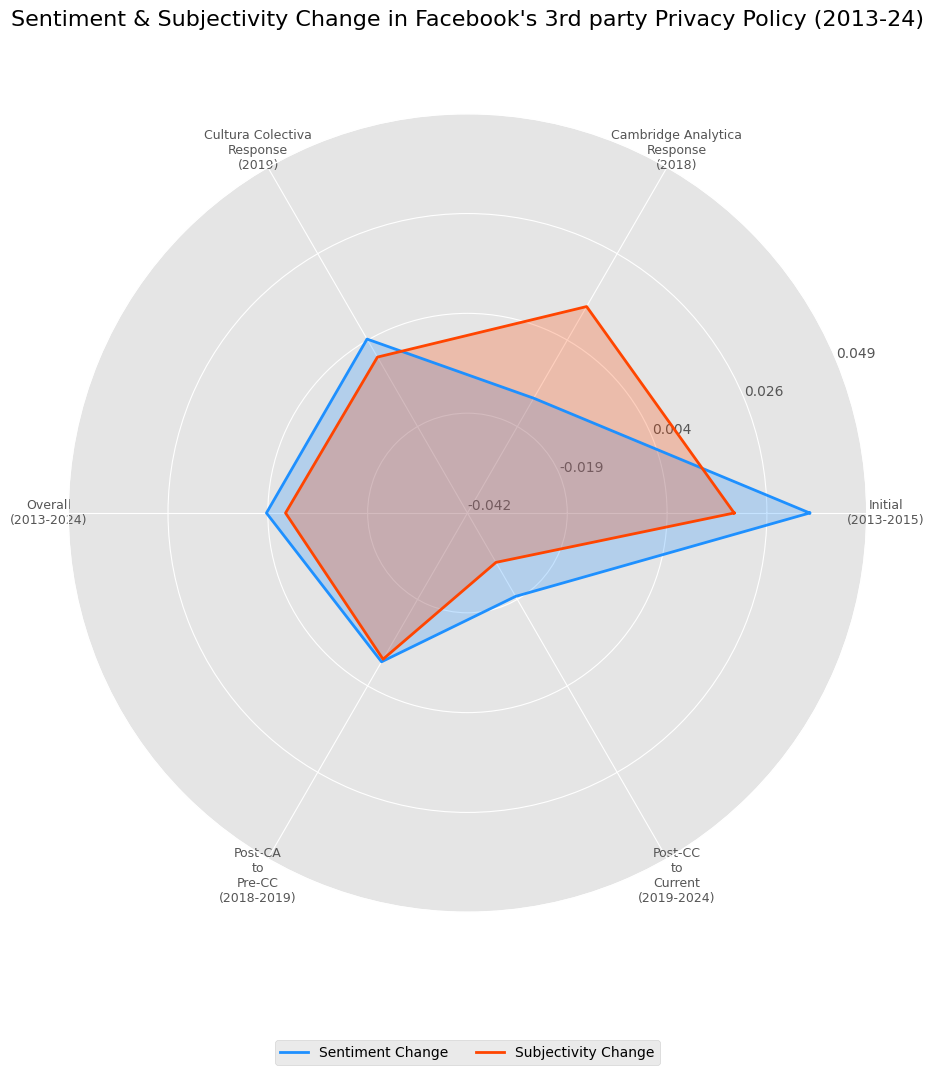

In [19]:
data_points = [
    {'label': 'Initial (2013-2015)', 'sentiment_change': 0.03611518684348089, 'subjectivity_change': 0.018973308761925767, 'magnitude': 153},
    {'label': 'Cambridge Analytica Response (2018)', 'sentiment_change': -0.011482805171479468, 'subjectivity_change': 0.012539426488359096, 'magnitude': 15},
    {'label': 'Cultura Colectiva Response (2019)', 'sentiment_change': 0.004020802487116525, 'subjectivity_change': -0.0007044365753209325, 'magnitude': 7},
    {'label': 'Overall (2013-2024)', 'sentiment_change': 0.0040634385232792836, 'subjectivity_change': -0.0002711527953002113, 'magnitude': 184},
    {'label': 'Post-CA to Pre-CC (2018-2019)', 'sentiment_change': -0.0025596600135981834, 'subjectivity_change': -0.0032419153666000122, 'magnitude': 14},
    {'label': 'Post-CC to Current (2019-2024)', 'sentiment_change': -0.019704832458421258, 'subjectivity_change': -0.028618015847158673, 'magnitude': 112}
]

df = pd.DataFrame(data_points)

labels = df['label'].values
sentiment_changes = df['sentiment_change'].values
subjectivity_changes = df['subjectivity_change'].values

num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

sentiment_changes_plot = np.concatenate((sentiment_changes, [sentiment_changes[0]]))
subjectivity_changes_plot = np.concatenate((subjectivity_changes, [subjectivity_changes[0]]))
angles_plot = angles + [angles[0]]

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(11, 11), subplot_kw=dict(polar=True)) # Adjusted figure size slightly

ax.plot(angles_plot, sentiment_changes_plot, color='dodgerblue', linewidth=2, linestyle='solid', label='Sentiment Change')
ax.fill(angles_plot, sentiment_changes_plot, 'dodgerblue', alpha=0.25)

ax.plot(angles_plot, subjectivity_changes_plot, color='orangered', linewidth=2, linestyle='solid', label='Subjectivity Change')
ax.fill(angles_plot, subjectivity_changes_plot, 'orangered', alpha=0.25)

ax.set_xticks(angles)
# Attempting more robust label wrapping for clarity
tick_labels_wrapped = [label.replace(' Response', '\nResponse').replace(' to ', '\nto\n').replace(' (', '\n(') for label in labels]
ax.set_xticklabels(tick_labels_wrapped, fontsize=9) # Reduced font size for labels

min_val = min(sentiment_changes.min(), subjectivity_changes.min())
max_val = max(sentiment_changes.max(), subjectivity_changes.max())
buffer = (max_val - min_val) * 0.2 # Increased buffer for radial limits

r_min = min_val - buffer
r_max = max_val + buffer

if r_min > -0.01 and r_min <= 0 : r_min = -0.015
if r_max < 0.01 and r_max >= 0 : r_max = 0.015
if r_min >= 0 : r_min = -0.005 # if all values are positive, still show a bit of negative axis
if r_max <= 0 : r_max = 0.005  # if all values are negative, still show a bit of positive axis

ax.set_rlim(r_min, r_max)

num_yticks = 5
yticks = np.linspace(r_min, r_max, num_yticks)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{tick:.3f}" for tick in yticks])

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2, fontsize=10) 
plt.title("Sentiment & Subjectivity Change in Facebook's 3rd party Privacy Policy (2013-24)", size=16, y=1.1) 

fig.tight_layout() # Apply tight_layout to the figure
plt.show()

Post-Cambridge Analytica Response (2018) shows the most dramatic shift - both sentiment and subjectivity spiked positively. This suggests Facebook adopted more reassuring, opinion-laden language rather than dry legal text, likely trying to rebuild trust through warmer, more subjective communication.
The Major Regulatory Responses (Cambridge Analytica and Cultura Colectiva in 2018-2019) cluster together with high positive changes in both dimensions. Facebook appeared to shift toward more subjective, positive framing during crisis periods - moving from neutral legal language to more persuasive, trust-building rhetoric.
Recent Period (Post-CC to Current, 2019-2024) shows interesting divergence - sentiment remained slightly positive while subjectivity dropped significantly. This could indicate Facebook learned to maintain positive framing while returning to more objective, legally defensible language.

# Readability
**Flesch Reading Ease**: higher score = easier readability.
- Scores b/t 30-49: "difficult to read 
- Harvard Law Review has a general readability score in the low 30s.  


**Flesch Kincaid Grade**: estimated US school grade level needed to understand the text 


In [ ]:
import textstat
import pandas as pd
import matplotlib.pyplot as plt

def calculate_all_readability_scores(text):
    return {
        'flesch_reading_ease': textstat.flesch_reading_ease(text),
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
        
    }

all_readability_data = []
sorted_dates = sorted(analyzer.policies.keys())

for date in sorted_dates:
    policy_text = analyzer.policies[date]['text'] # Use the original text
    scores = calculate_all_readability_scores(policy_text)
    scores['date'] = date
    all_readability_data.append(scores)

readability_df_notebook = pd.DataFrame(all_readability_data)

if not readability_df_notebook.empty:
    print(readability_df_notebook.head())

    #  Flesch Reading Ease
    plt.figure(figsize=(12, 7))
    plt.plot(readability_df_notebook['date'], readability_df_notebook['flesch_reading_ease'], marker='o', linestyle='-', color='b')
    plt.title('Policy Readability (Flesch Reading Ease) Over Time', fontsize=16, pad=20)
    plt.xlabel('Policy Date', fontsize=12)
    plt.ylabel('Flesch Reading Ease Score', fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    #  Flesch-Kincaid Grade Level
    plt.figure(figsize=(12, 7))
    plt.plot(readability_df_notebook['date'], readability_df_notebook['flesch_kincaid_grade'], marker='s', linestyle='-', color='r')
    plt.title('Policy Readability (Flesch-Kincaid Grade Level) Over Time', fontsize=16, pad=20)
    plt.xlabel('Policy Date', fontsize=12)
    plt.ylabel('Flesch-Kincaid Grade Level', fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No policies found in analyzer or readability data could not be generated.")

# Hidden

## policy semmantic similarity (updated - maybe delete)

In [ ]:
plot_df = similarity_df.copy()
plot_df['X_Axis'] = np.arange(len(plot_df))

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='Period', y='Similarity', data=plot_df, palette='viridis') # Using a color palette for aesthetics

plt.title('Policy Semantic Similarity by Period with Change Highlight', pad=20, fontsize=16)
plt.ylabel('Similarity Percentage (%)', fontsize=12)
plt.xlabel('Time Period', fontsize=12)
plt.ylim(0, 100) # Keep Y-axis consistent for percentages
plt.grid(axis='y', linestyle='--', alpha=0.7) # Only Y-grid for cleaner look

# Add value labels on top of each bar
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, # Offset text slightly above bar
            f'{height:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Add explicit change indicators between bars
for i in range(len(plot_df) - 1):
    current_similarity = plot_df.loc[i, 'Similarity']
    next_similarity = plot_df.loc[i + 1, 'Similarity']
    change = next_similarity - current_similarity

    # Position for the arrow and text
    x_start = plot_df.loc[i, 'X_Axis'] + 0.5 # Midpoint between current bar and next
    x_end = plot_df.loc[i + 1, 'X_Axis'] - 0.5 # Midpoint between current bar and next
    y_pos = (current_similarity + next_similarity) / 2 # Midpoint of similarity values

    # Determine arrow direction and color
    arrow_color = 'green' if change > 0 else 'red'
    arrow_direction = 'right' if change > 0 else 'left' # For horizontal arrow

    # Vertical offset for text based on change direction
    text_y_offset = -5 if change < 0 else 5 # Adjusted offset for visual clarity

    # Add change text
    ax.text(x_start, y_pos + text_y_offset,
            f"{'+' if change > 0 else ''}{change:.2f}%",
            ha='center', va='center', color=arrow_color, fontweight='bold', fontsize=10)

    # Add connection lines/arrows (simplified for clarity as direct arrows might get messy)
    # A simple dashed line connecting the top of bars can imply flow
    ax.plot([bar.get_x() + bar.get_width()/2, ax.patches[i+1].get_x() + ax.patches[i+1].get_width()/2],
            [height, next_similarity], color='gray', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

: 

## parallel coordinates plot for topics 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Data from your main.ipynb
topic_data_dict = {
    '2013': [1, 2, 1, 1, 2, 10],
    '2015': [1, 1, 2, 1, 2, 17],
    '2018': [2, 5, 2, 1, 2, 25],
    '2024': [2, 3, 3, 0, 3, 28]
}
topics_index = ['Data Collection', 'User Consent', 'Data Sharing', 'Data Protection', 'User Rights', 'Compliance']
topics_df_original = pd.DataFrame(topic_data_dict, index=topics_index)

# For parallel_coordinates, we typically want each row to be a sample (a year in this case)
# and columns to be the dimensions (topics).
# So, we need to transpose the DataFrame and then add a column for the 'Year' to color by.
topics_df_transposed = topics_df_original.transpose()

# Add a 'Year' column for coloring the lines in the plot
topics_df_transposed['Year'] = topics_df_transposed.index

# Reorder columns to have 'Year' first for standard parallel_coordinates usage, though it can handle it otherwise.
# Or ensure 'Year' is the class_column.
cols = ['Year'] + [col for col in topics_df_transposed.columns if col != 'Year']
data_for_plot = topics_df_transposed[cols]


# Create the parallel coordinates plot
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))

parallel_coordinates(data_for_plot, 'Year', colormap=plt.get_cmap("Set1"))

plt.title('Policy Topic Mentions by Year (Parallel Coordinates)', fontsize=16, pad=20)
plt.xlabel('Policy Topics', fontsize=12)
plt.ylabel('Number of Mentions', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate topic labels for better readability
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='major', axis='y', linestyle='--', alpha=0.7) # Keep y-axis grid
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
plt.savefig("policy_topics_parallel_coordinates.png")
plt.show()

print("Parallel coordinates plot for policy topics generated and saved as policy_topics_parallel_coordinates.png")